**Aplicação de técnicas de classificação de texto na arquitetura de Chatbots hierárquicos**

**Mestrado Profissional em Computação Aplicada - PPCA - Universidade de Brasília**

**Disciplina**: Mineração de Dados

**Orientador**: Prof. Dr. Marcelo Ladeira <mladeira@unb.br>

**Alunos**: 
 - José Ronaldo Agra De Souza Filho <jose.agra@aluno.unb.br>
 - Bruno Gomes Resende <bruno.resende@aluno.unb.br>
 - Célio Castro Wermelinger <celio.wermelinger@aluno.unb.br> 

**Palavras-Chave:**

Chatbot; Text Classification; Machine Learning; Text Mining; NLP;

In [1]:
# Install packages
# Note: use Python 3.8 env
#!pip install --pre pycaret

## Importação das bibliotecas necessárias a este notebook.

In [2]:
# Import packages
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from pycaret.classification import *

# download das stopwords para o idioma português
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ronal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Montagem dos datasets a serem utilizados no experimento

Cada categoria possui um arquivo contendo o texto que serve se exemplo de treinamento e a categoria de cada um desses textos.

Primeiro é montado um único dataset, contendo todos os exemplos das 3 classes, e as referidas categorias.

Após isso, este dataset é clonado 3 vezes, sendo um para cada classe. Nestes novos datasets, a categorizaçõ passa a ser binária. Ou seja, em vez de ter a informação das 3 classes, ele tem a informação se os exemplos de treinamento são ou não de uma referida classe.

Assim, cria-se os seguintes datasets:
* df_treino_covid: contém todos os exemplos de treinamento. Para os que representam a classe "covid", a coluna "category" é configurada com 1, caso contrário com 0.
* df_treino_seloturismo: contém todos os exemplos de treinamento. Para os que representam a classe "seloturismo", a coluna "category" é configurada com 1, caso contrário com 0.
* df_treino_tuberculose: contém todos os exemplos de treinamento. Para os que representam a classe "tuberculose", a coluna "category" é configurada com 1, caso contrário com 0.

In [7]:
# Montagem do dataset
df_covid = pd.read_csv('data/exemplos-treinamento-covid.csv', delimiter=';')
df_seloturismo = pd.read_csv('data/exemplos-treinamento-seloturismo.csv', delimiter=';')
df_tuberculose = pd.read_csv('data/exemplos-treinamento-tuberculose.csv', delimiter=';')
df_teste = pd.read_csv('data/dados-testes-experimentos.csv', delimiter=';')

#df_all = pd.concat([df_covid, df_seloturismo, df_tuberculose, df_teste], axis=0)
df_all = pd.concat([df_covid, df_seloturismo, df_tuberculose], axis=0)
df_all.reset_index(drop=True, inplace=True)
df_all['category'] = df_all.reset_index().category.map({'covid':1, 'seloturismo':0, 'tuberculose':0})

df_teste['category'] = df_teste.reset_index().category.map({'covid':1, 'seloturismo':0, 'tuberculose':0})

## Representação dos textos em vetores

Realiza a representação de texto, fazendo uso do TF-IDF e realizando algumas tarefas de tratamento dos dados.

Ao realizar a vetorização dos textos, são removidas as stopwords e também os acentos das palavras.

Deciciu-se por não realizar as tarefas de "lemmatization" nem de "stemming", porque no caso deste experimento a simplificação de palavras em radicais poderia prejudicar o desempenho na identificação das classes.

In [9]:
# recupera as stopwords do idioma português
stop_words = stopwords.words('portuguese')

# vetorização das palavras
tv = TfidfVectorizer(lowercase=True, stop_words=stop_words, strip_accents='unicode', token_pattern="[A-Za-z]+")

tf_idf_covid = tv.fit_transform(df_all['input'])
tf_idf_teste = tv.transform(df_teste['input'])

# vetorização para o dataframe referente à categoria COVID
#df_dados_vetorizados = pd.DataFrame(tf_idf_covid.toarray(), columns=tv.get_feature_names())
#df_dados_vetorizados['target_cat'] = df_all.reset_index().category

#dados_treino_validacao = df_dados_vetorizados.sample(frac=0.8, random_state=786).reset_index(drop=True)
#dados_teste = df_dados_vetorizados.drop(dados_treino_validacao.index).reset_index(drop=True)

dados_treino_validacao = pd.DataFrame(tf_idf_covid.toarray(), columns=tv.get_feature_names())
dados_treino_validacao['target_cat'] = df_all.reset_index().category
dados_teste = pd.DataFrame(tf_idf_teste.toarray(), columns=tv.get_feature_names())
dados_teste['target_cat'] = df_teste.reset_index().category

print('Dados para modelagem (treino/validação): ' + str(dados_treino_validacao.shape))
print('Dados para testes: ' + str(dados_teste.shape))

dados_teste

Dados para modelagem (treino/validação): (1043, 1048)
Dados para testes: (157, 1048)


,abdomen,abracar,abraco,acesso,acho,acionar,acometer,acometidos,acompanhamento,acontece,acontecera,acordo,acougue,acrescido,acrescimo,acrescimos,aderi,aderir,aderiram,aderiu,adesao,adesoes,adianta,adiantou,adicionais,adicional,adocao,adota,adotadas,adotando,adotar,adotaram,adotarem,adotou,aferir,afetadas,agencia,agir,agora,agua,ainda,ajuda,ajudara,albergaria,albergues,alcool,alguem,algum,alguma,alimentar,alojam,alojar,ambiente,ambientes,animais,antigo,anvisa,aparece,apareceu,aparelho,aperto,aplicabilidade,apoio,apos,apresenta,aprovacao,aptos,ar,arca,area,arma,ase,assim,assintomatico,associou,asua,ate,atende,atender,atendimento,atinge,ativacao,ativado,atividade,atividades,ativo,atrativos,atraves,atua,atualizacao,atualizacoes,atualizado,atualizar,atualizarei,atuando,aumenta,aumentam,aumentar,aumentarao,aumento,auto,autorizacao,avalia,bacilo,bacteria,bacteriana,bacterias,baixa,baixar,bancos,banheiro,base,bebedouro,beber,bebida,beijo,beijos,beneficios,bexiga,boas,boca,br,brasil,brasileiro,bubcar,busco,cabelo,cada,cadastrado,cadastrados,cadastramento,cadastrar,cadastro,cadastrotur,cadastrur,cadastur,cadtrur,cadtur,caminhada,cancelar,capacitados,carne,carro,casa,caseiro,caso,causa,causam,cd,cedula,central,cerebral,cerebro,certeza,cgu,chama,chance,chegar,cheio,cheiro,china,chineses,cidadao,circulacao,clientes,cliquei,cobertura,cobrada,cobrado,cobrar,cobrir,code,coemcou,coisa,coisas,colocando,comecou,comer,comerciais,comercio,comida,commerce,comorbidade,compartilhada,compartilhar,compensar,completar,comprar,compras,comprometidos,comprova,comprovacao,comprovocao,comum,comuns,conceito,condicao,condicionado,condicoes,condominio,confiar,confiavel,confiro,conformidade,conjunto,conseguindo,conseguir,consideracao,consigo,construidos,consultar,consulto,consumo,conta,contagiado,contagiar,contagio,contaminacao,contaminada,contaminadas,contaminado,contaminados,contaminar,contato,conter,continua,continuar,contra,contrair,contraprova,contribuir,contribuira,controladoria,controle,conversa,conversei,coronavirus,corpo,correios,correm,corrente,corro,corticoides,cov,covid,covide,credenciados,criacao,criada,crianca,...,qualquer,quantas,quanto,quantos,quer,queria,quero,quimica,quiser,ramo,ratear,realizar,receber,recebi,receita,recolher,recomendacoes,recomendadas,recomendado,recomendados,recomensacoes,rede,reducao,reduzir,reduzira,referente,regem,registrado,registrados,registrar,registro,regra,regras,relacao,relacionadas,remedio,remunerar,reponsavel,representa,representara,representatividade,requerer,requisito,requisitos,resorts,respira,respiratorias,responsavel,retirar,retomada,reveste,rins,risco,riscos,rosto,roupa,roupas,sabendo,saber,sacola,sacolas,sair,sairam,saiu,sanguinea,sanitaria,sanitarias,sao,sarar,sars,saude,secrecoes,sedex,segmento,segue,seguido,seguindo,seguir,segura,seguranca,seguras,seguro,seguros,sei,sel,selecionei,selo,selos,sempre,sendo,sentido,sentindo,sentira,sentirao,sera,serao,serve,servico,servicos,setor,setores,setorias,severa,sido,significa,sim,similares,sintoma,sintomas,sistema,site,situacao,so,sobre,sobrevive,sofrerao,sol,solicitacao,solicitar,status,submetidos,sucesso,sujos,superficies,supermercado,surgir,surjam,sus,suspendi,suspensa,suspensao,suspensas,tabaco,tambem,tapete,taxa,taxas,tbsnc,tecido,tecidos,tecnico,tempo,ter,tera,terao,terbeculose,teste,tiberculose,tipo,tipos,tira,tirar,toalha,tocando,tocar,todo,todos,tomar,torax,tornar,tornara,tosse,tossir,trabalho,transmissao,transmite,transmitida,transmitido,transmitidos,transmitir,transportadoras,transversais,trara,trasmitida,tratamento,tratar,traves,treinamento,tres,troca,tuberculose,tuberculoso,turismo,turista,turistas,turistica,turisticas,turistico,turisticos,tussa,uber,umida,unhas,uniao,unico,urinaria,urinario,usa,usar,uso,usuario,usuarios,usufluir,utensilhos,utilizados,utilizando,utilizar,vacina,vacinar,vacinas,vai,validacao,validade,validados,valor,vantagem,vantagens,vantajoso,vao,variacao,varias,varios,varrer,vc,veio,vejo,vem,vendi,ver,verduras,verificar,verificara,ver

## Criação dos classificadores binários

São criados 3 classificadores binários, cada um especializado em identificar uma das categorias existentes: covid, selo turismo e tuberculose.

Para cada classificador, a configuração utilizada será:
* Dados a classificar (data): dados relacionados à categoria COVID;
* Coluna que representa a classe (target): a coluna 'target_cat' que informa se o texto é da classe covid (1) ou não (0).
* Semente para possibilitar a reprodutibilidade (session_id): 20221
* Proporção do dataset que será usado para treinamento e validação (train_size): 70%
* Quantidade de dobras (folds) que será utilizada na validação cruzada (fold): 10 (por padrão a estratégia utilizada é a 'stratified kfold').
* Controle da entrada de confirmação de tipos de dados quando o setup é executado (silent): True (devido ao modo de execução automatizado).

## Classificador binário para a classe COVID

In [10]:
config_covid = setup(data=dados_treino_validacao, target='target_cat', session_id=20221, fold=10,
                     train_size = 0.7, test_data=dados_teste, silent=True, fix_imbalance=True)

,Description,Value
0,session_id,20221
1,Target,target_cat
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1043, 1048)"
5,Missing Values,False
6,Numeric Features,558
7,Categorical Features,489
8,Ordinal Features,False
9,High Cardinality Features,False


## Comparação entre os modelos disponíveis na biblioteca

Essa função treina todos os modelos disponíveis da biblioteca, e os pontua usando validação cruzada configurada no setup estratificada para avaliação de métricas.

A saída imprime uma grade de pontuação que mostra as métricas: acurácia média, AUC, recall, precisão e F1 de todos os modelos disponíveis na biblioteca de modelos.


In [11]:
compare_models(probability_threshold=0.75)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9654,0.0000,0.8757,0.9114,0.8837,0.8639,0.8701,0.0910
svm,SVM - Linear Kernel,0.9568,0.0000,0.7261,0.9900,0.8179,0.7962,0.8190,0.0850
lightgbm,Light Gradient Boosting Machine,0.9539,0.9828,0.7276,0.9665,0.8184,0.7938,0.8108,0.0970
et,Extra Trees Classifier,0.9510,0.9715,0.7096,0.9683,0.7997,0.7746,0.7969,0.2290
rf,Random Forest Classifier,0.9501,0.9797,0.6779,1.0000,0.7895,0.7645,0.7929,0.1840
xgboost,Extreme Gradient Boosting,0.9491,0.9803,0.6717,1.0000,0.7868,0.7611,0.7896,1.3190
catboost,CatBoost Classifier,0.9482,0.9825,0.6721,0.9929,0.7859,0.7593,0.7866,6.7300
gbc,Gradient Boosting Classifier,0.9472,0.9676,0.6658,0.9875,0.7804,0.7534,0.7805,0.4840
lr,Logistic Regression,0.9386,0.9907,0.6037,1.0000,0.7207,0.6933,0.7358,0.6480
dt,Decision Tree Classifier,0.9366,0.8615,0.7526,0.8862,0.7959,0.7605,0.7750,0.0870


CustomProbabilityThresholdClassifier(alpha=1.0, class_weight=None,
                                     classifier=RidgeClassifier(alpha=1.0,
                                                                class_weight=None,
                                                                copy_X=True,
                                                                fit_intercept=True,
                                                                max_iter=None,
                                                                normalize=False,
                                                                random_state=20221,
                                                                solver='auto',
                                                                tol=0.001),
                                     copy_X=True, fit_intercept=True,
                                     max_iter=None, normalize=False,
                                     probability_threshold=0.75,
           

## Criando os modelos melhor pontuados na compare_models

In [12]:
# cria o modelo
modelo = create_model('ridge', probability_threshold=0.75)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9905,0.0000,0.9412,1.0000,0.9697,0.9641,0.9647
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9905,0.0000,0.9412,1.0000,0.9697,0.9641,0.9647
3,0.9615,0.0000,0.7500,1.0000,0.8571,0.8354,0.8470
4,0.9135,0.0000,0.5000,0.8889,0.6400,0.5952,0.6271
5,0.9904,0.0000,0.9375,1.0000,0.9677,0.9621,0.9628
6,0.9808,0.0000,1.0000,0.8889,0.9412,0.9297,0.9320
7,0.9327,0.0000,0.9375,0.7143,0.8108,0.7708,0.7813
8,0.9808,0.0000,0.9375,0.9375,0.9375,0.9261,0.9261


In [13]:
# realiza o ensemble dos modelos e seleciona o melhor
melhor_modelo_bagging = ensemble_model(modelo, choose_better=True,
                                       return_train_score=True,
                                       probability_threshold=0.75)

In [14]:
# Imprimindo melhor modelo
print(melhor_modelo_bagging)

CustomProbabilityThresholdClassifier(alpha=1.0, class_weight=None,
                                     classifier=RidgeClassifier(alpha=1.0,
                                                                class_weight=None,
                                                                copy_X=True,
                                                                fit_intercept=True,
                                                                max_iter=None,
                                                                normalize=False,
                                                                random_state=20221,
                                                                solver='auto',
                                                                tol=0.001),
                                     copy_X=True, fit_intercept=True,
                                     max_iter=None, normalize=False,
                                     probability_threshold=0.75,
           

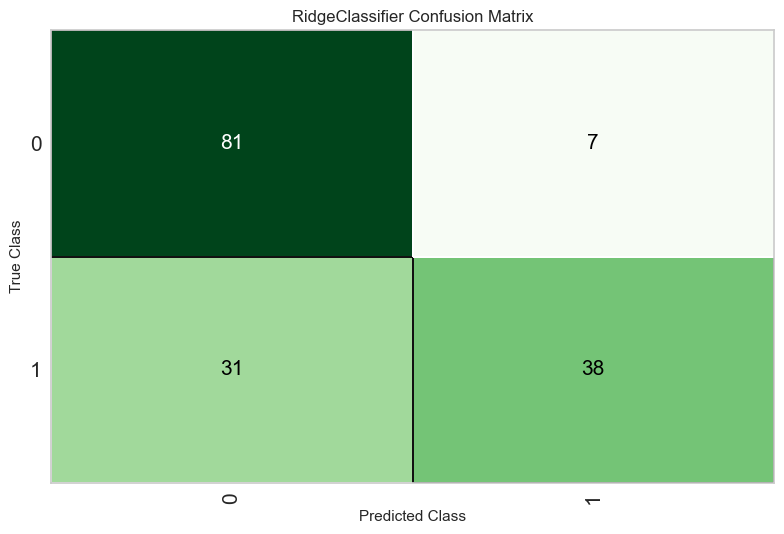

In [15]:
plot_model(melhor_modelo_bagging, plot = 'confusion_matrix')

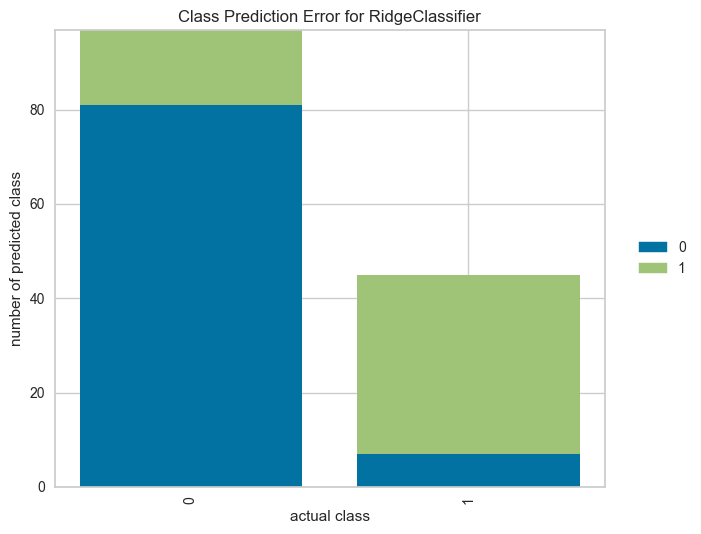

In [16]:
plot_model(melhor_modelo_bagging, plot = 'error')

## Predição do modelo treinado

Antes de finalizar o modelo, realiza-se uma verificação final prevendo o conjunto de teste/hold-out e revisando as métricas de avaliação. Esta verificação é realizada com os 30% dos dados separados para isto no início deste notebook.

Perceba abaixo que não houve grande variação entre os resultados do teste/hold-out e do treinamento, inclusive as métricas do teste se apresentam melhores, isso indica que não ocorreu o overfitting.

In [18]:
predict_model(melhor_modelo_bagging, probability_threshold=0.75)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7580,0.7356,0.5507,0.8444,0.6667,0.4896,0.5172


,abdomen,acesso,acho,acontece,acrescimo,aderi,aderir,aderiram,aderiu,adesao,...,vao_0.0,vc_0.0,veio_0.7226043343544006,vem_0.648135244846344,vendi_0.0,verificara_0.439875066280365,vindo_0.0,vistorias_0.0,target_cat,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0,0
153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0,0
154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0,0
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0,0


## Finalização do modelo

A finalização do modelo é a última etapa do experimento. A função finalize_model() ajusta o modelo ao conjunto de dados completo, incluindo a amostra de teste/hold-out (30% neste caso). O objetivo dessa função é treinar o modelo no conjunto de dados completo antes de ser implantado na produção.

In [19]:
modelo_final = finalize_model(melhor_modelo_bagging)
predicoes = predict_model(modelo_final, probability_threshold=0.75)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7580,0.7356,0.5507,0.8444,0.6667,0.4896,0.5172


In [20]:
predicoes.head(200)

,abdomen,acesso,acho,acontece,acrescimo,aderi,aderir,aderiram,aderiu,adesao,...,vao_0.0,vc_0.0,veio_0.7226043343544006,vem_0.648135244846344,vendi_0.0,verificara_0.439875066280365,vindo_0.0,vistorias_0.0,target_cat,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0,0
153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0,0
154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0,0
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0,0


## Salvando o modelo final

Agora terminamos o experimento finalizando o modelo que agora está armazenado na variável 'modelo_final'.

Nosso modelo final pode ser descrito como:

Também usamos o modelo armazenado em final_rf para prever data_unseen. Isso nos leva ao final de nosso experimento, mas uma pergunta ainda deve ser feita: o que acontece quando você tem mais dados novos para prever? Você tem que passar por todo o experimento novamente? A resposta é não, a função embutida do PyCaret save_model() permite que você salve o modelo junto com todo o pipeline de transformação para uso posterior.

In [ ]:
save_model(modelo_final,'models/20220914-modelo-final-covid-ada')